In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns',500)
color_pal= plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

In [ ]:
key="005121895ee400648fcd98e477cae9d4"

In [ ]:
fred=Fred(api_key=key)
fred

## Search the economic data

In [ ]:
sp_search=fred.search('S&P',order_by='popularity')
sp_search

In [ ]:
sp500=fred.get_series(series_id='SP500')

In [ ]:
sp500.plot(figsize=(10,5),title="S&P 500", lw=2)

In [ ]:
un_empl= fred.search('unemployment')
un_empl

In [ ]:
unrate=fred.get_series('UNRATE')
unrate

In [ ]:
unrate.plot(figsize=(10,5),title="Unrate", lw=2)

In [107]:
unemp_df= fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [106]:
unemp_df=unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')

In [105]:
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
all_results=[]

for myid in unemp_df.index:
    results= fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results)

In [ ]:
unemp_results= pd.concat(all_results,axis=1)
unemp_results

In [96]:
unemp_states=unemp_results.drop(['UNRATE','M08311USM156SNBR'],axis=1)

In [97]:
px.line(unemp_states)

<Axes: >

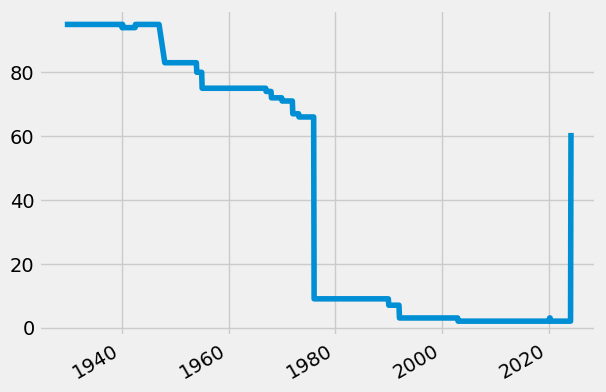

In [92]:
unemp_states.isna().sum(axis=1).plot()

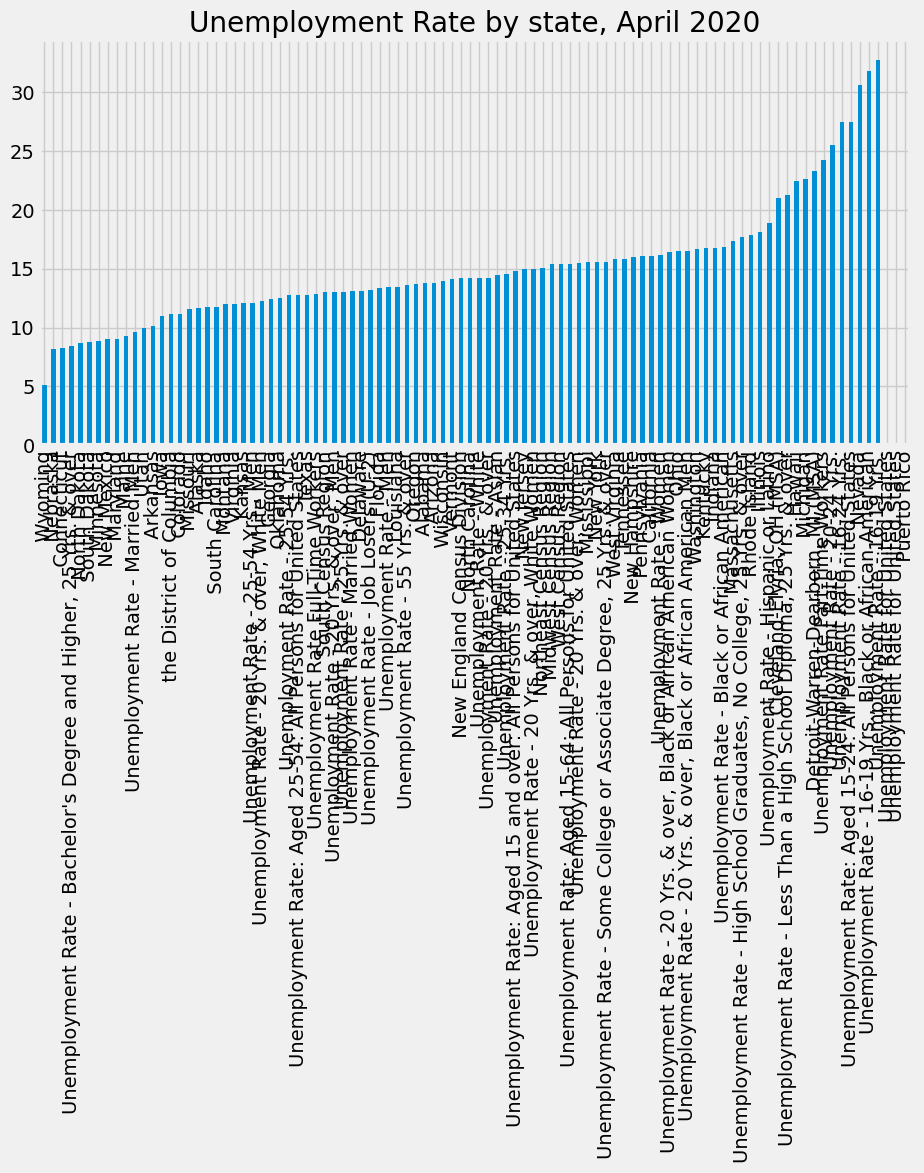

In [130]:
ax=unemp_states.iloc[unemp_states.index == "2020-04-01"].T \
    .sort_values('2020-04-01') \
    .plot(kind='bar',figsize=(10,5),title="Unemployment Rate by state, April 2020")

ax.legend().remove()
plt.show()